# Importing Libraraies

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm

from sklearn.feature_extraction.text  import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

from collections import defaultdict

# Reading the dataset

In [2]:
df = pd.read_csv('./indian_food.csv')
df.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East


# EDA

In [3]:
df.describe()

,prep_time,cook_time
count,270.000000,270.000000
mean,30.988889,34.796296
std,70.762311,46.990539
min,-1.000000,-1.000000
25%,10.000000,20.000000
50%,10.000000,30.000000
75%,20.000000,40.000000
max,500.000000,720.000000


### Findind out the null values and replacing them with actual value

In [4]:
df.isna().sum()

name              0
ingredients       0
diet              0
prep_time         0
cook_time         0
flavor_profile    0
course            0
state             0
region            1
dtype: int64

In [5]:
df.loc[df['region'].isna(),'region'] = 'North'

In [6]:
df.loc[df['state']== '-1']

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
7,Kaju katli,"Cashews, ghee, cardamom, sugar",vegetarian,10,20,sweet,dessert,-1,-1
9,Kheer,"Milk, rice, sugar, dried fruits",vegetarian,10,40,sweet,dessert,-1,-1
10,Laddu,"Gram flour, ghee, sugar",vegetarian,10,40,sweet,dessert,-1,-1
12,Nankhatai,"Refined flour, besan, ghee, powdered sugar, yo...",vegetarian,20,30,sweet,dessert,-1,-1
94,Khichdi,"Moong dal, green peas, ginger, tomato, green c...",vegetarian,40,20,spicy,main course,-1,-1
96,Kulfi falooda,"Rose syrup, falooda sev, mixed nuts, saffron, ...",vegetarian,45,25,sweet,dessert,-1,-1
98,Lauki ki subji,"Bottle gourd, coconut oil, garam masala, ginge...",vegetarian,10,20,spicy,main course,-1,-1
109,Pani puri,"Kala chana, mashed potato, boondi, sev, lemon",vegetarian,15,2,spicy,snack,-1,-1
111,Papad,"Urad dal, sev, lemon juice, chopped tomatoes",vegetarian,5,5,spicy,snack,-1,-1
115,Rajma chaval,"Red kidney beans, garam masala powder, ginger,...",vegetarian,15,90,spicy,main course,-1,North


# Data Engineering

Here, we are filtering out the state and the ingredients of their corresponding food

In [7]:
x = df.groupby('state')['ingredients'].apply(list).reset_index(name='ingredients')

In [8]:
# function to get the uniqueue values from each string
def get_unique_ingred(ingred):
    for i in ingred:
        words = i.lower().split(',')
#         print(type(words))
        res = []
        for word in words:
            word = word.strip()
            if ' ' in word:
                word = word.replace(' ','_')
            res.append(word)
    return set(res)

In [9]:
x['ingredients'] = x['ingredients'].apply(get_unique_ingred)
x

,state,ingredients
0,-1,"{olive_oil, watercress, butter, red_onion, red..."
1,Andhra Pradesh,"{rice_flour, green_moong_beans}"
2,Assam,"{black_sesame_seeds, glutinous_rice, gur}"
3,Bihar,"{sattu, dough, filling, atta, mustard_oil}"
4,Chhattisgarh,"{white_urad_dal, whole_wheat_flour, garam_masa..."
5,Goa,"{black_pepper, ginger_powder, fennel_seeds, gr..."
6,Gujarat,"{ridge_gourd, sugar, baking_soda, peas, grated..."
7,Haryana,"{besan, garam_masala_powder, gram_flour, curry..."
8,Himachal Pradesh,"{yogurt, cloves, lentils, rice, ghee, cinnamon..."
9,Jammu & Kashmir,"{cottage_cheese, badam, dried_rose_petals, pis..."


In [10]:
x.drop(0,inplace=True)

In [11]:
x['ingredients'] = x['ingredients'].apply(' '.join)
x

,state,ingredients
1,Andhra Pradesh,rice_flour green_moong_beans
2,Assam,black_sesame_seeds glutinous_rice gur
3,Bihar,sattu dough filling atta mustard_oil
4,Chhattisgarh,white_urad_dal whole_wheat_flour garam_masala_...
5,Goa,black_pepper ginger_powder fennel_seeds grated...
6,Gujarat,ridge_gourd sugar baking_soda peas grated_coconut
7,Haryana,besan garam_masala_powder gram_flour curry_lea...
8,Himachal Pradesh,yogurt cloves lentils rice ghee cinnamon salt ...
9,Jammu & Kashmir,cottage_cheese badam dried_rose_petals pistach...
10,Jharkhand,coconut water whole_wheat_flour ghee cardamom_...


In [12]:
corpus = x['ingredients'].tolist()
corpus[4][:36]

'black_pepper ginger_powder fennel_se'

In [13]:
tfidf = TfidfVectorizer()
vec = tfidf.fit_transform(corpus)
final_df = pd.DataFrame(data=vec.toarray(),columns=tfidf.get_feature_names_out())
final_df.T.nlargest(5, 0)

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
green_moong_beans,0.707107,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
rice_flour,0.707107,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
all_purpose_flour,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
almonds,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.447214,0.0,0.0,0.0,0.0
arhar_dal,0.000000,0.0,0.0,0.486694,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


# K-Means

Calculating the silhouette scores of different cluster to find out the optimal number of cluster

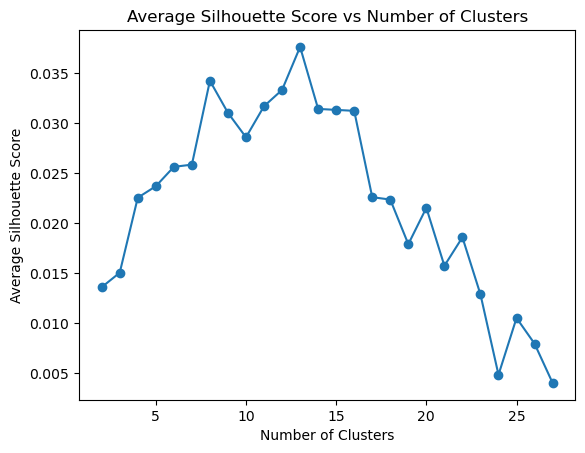

In [14]:

max_clusters = 27
silhouette_scores = []

for n_clusters in range(2, max_clusters + 1):
    # Fit K-means to the TF-IDF matrix
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(final_df)

    # Calculate the silhouette score
    silhouette = silhouette_score(final_df, kmeans.labels_)
    silhouette_scores.append(silhouette)

# Plot the silhouette scores
plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Average Silhouette Score')
plt.title('Average Silhouette Score vs Number of Clusters')
plt.show()


12 gives us the best silhoutte score

In [35]:
no_cluster = 14

kmeans = KMeans(n_clusters=no_cluster,init='k-means++', random_state=36)
y_pred = kmeans.fit_predict(vec)

In [36]:
x['cluster'] = y_pred
x

,state,ingredients,cluster
1,Andhra Pradesh,rice_flour green_moong_beans,7
2,Assam,black_sesame_seeds glutinous_rice gur,2
3,Bihar,sattu dough filling atta mustard_oil,9
4,Chhattisgarh,white_urad_dal whole_wheat_flour garam_masala_...,1
5,Goa,black_pepper ginger_powder fennel_seeds grated...,11
6,Gujarat,ridge_gourd sugar baking_soda peas grated_coconut,11
7,Haryana,besan garam_masala_powder gram_flour curry_lea...,1
8,Himachal Pradesh,yogurt cloves lentils rice ghee cinnamon salt ...,0
9,Jammu & Kashmir,cottage_cheese badam dried_rose_petals pistach...,6
10,Jharkhand,coconut water whole_wheat_flour ghee cardamom_...,13


# Plotting

In [37]:
import geopandas as gpd

In [38]:
out_res = pd.concat([x['state'],x['cluster']], axis=1)
out_res.replace('NCT of Delhi','Delhi',inplace=True)

In [39]:
indian_map = gpd.read_file('./India-State-and-Country-Shapefile-Updated-Jan-2020-master/India_State_Boundary.shp')

indian_map.replace('Jammu and Kashmir','Jammu & Kashmir',inplace=True)
indian_map.replace('Telengana','Telangana',inplace=True)
indian_map.replace('Tamilnadu','Tamil Nadu',inplace=True)
indian_map.replace('Chhattishgarh','Chhattisgarh',inplace=True)

In [40]:
merged = indian_map.set_index('State_Name').join(out_res.set_index('state'))

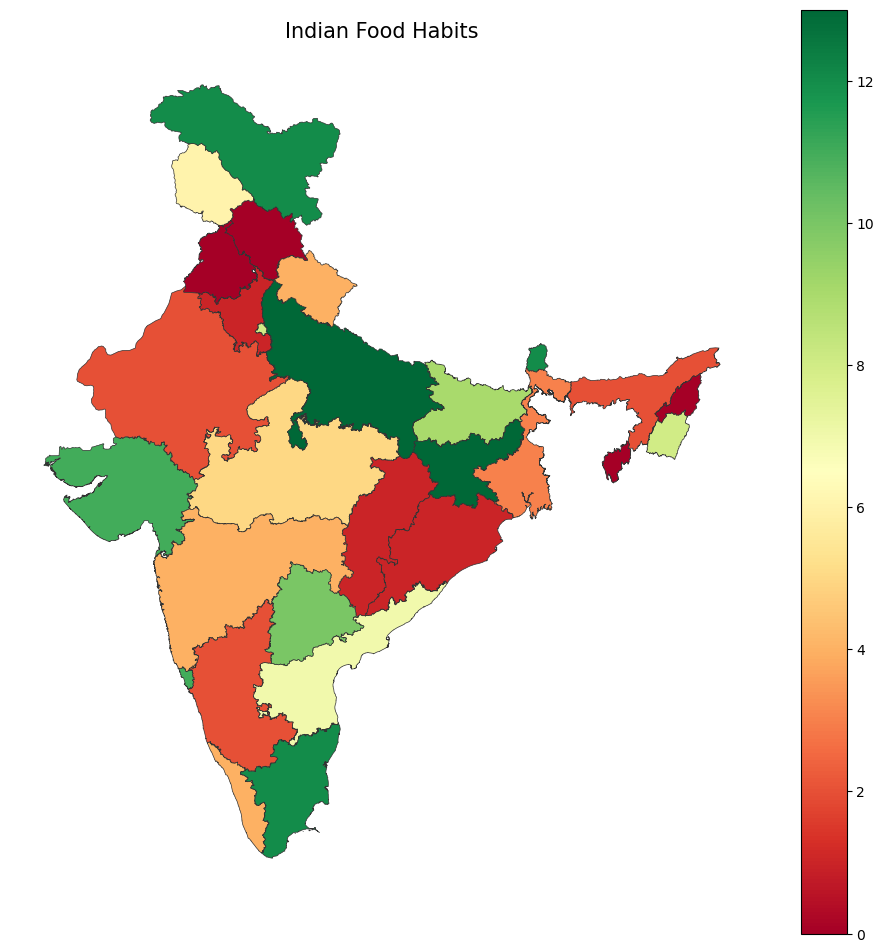

In [41]:
fig, ax = plt.subplots(1, figsize=(12, 12))
ax.axis('off')
ax.set_title('Indian Food Habits',
             fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = merged.plot(column='cluster', cmap='RdYlGn', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)

# Cluster Analysis

In [42]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    cluster_word_count = defaultdict(dict)
    
    # interate over each cluster
    for cluster_label in  range(no_cluster):
        cluster_df = x[x['cluster'] == cluster_label]
        cluster_text = ' '.join(cluster_df['ingredients'])
        words = cluster_text.split()
        
        word_count = defaultdict(int)
        for word in words:
            word_count[word] += 1
        
        cluster_word_count[cluster_label] = word_count
        
#         return cluster_word_count
        top_cluster_words = defaultdict(dict)
        
        for cluster_label, word_count in  cluster_word_count.items():
            top_cluster_words[cluster_label] = dict(sorted(word_count.items(), key=lambda item: item[1],reverse=True))

        
    return top_cluster_words
        
def plotWords(dfs, n_feats):
    for i in range(no_cluster):
        plt.title((f'Top {n_feats} ingredients in cluster {i}'), fontsize=10, fontweight='bold')
        key = list(dfs[i].keys())
        value = list(dfs[i].values())
        sns.barplot(x=value[:n_feats], y=key[:n_feats],orient='h')
        plt.title(f'{n_feats} most common ingredients in cluster {i}')
        plt.show()

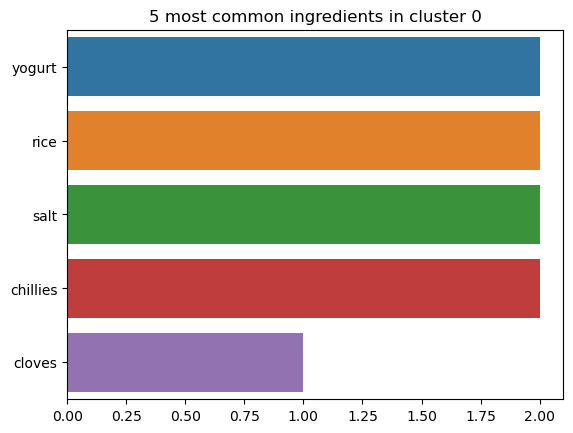

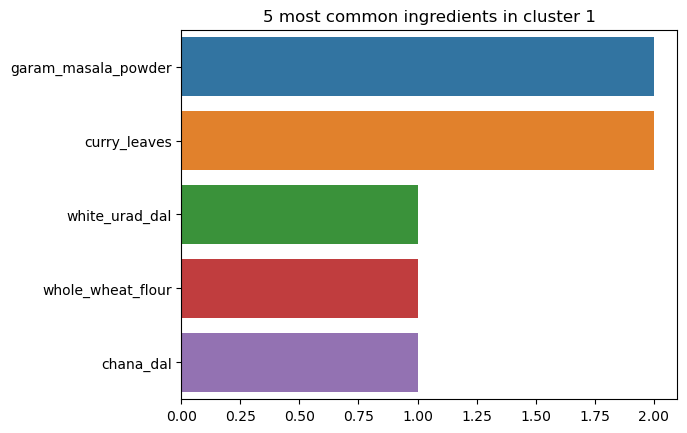

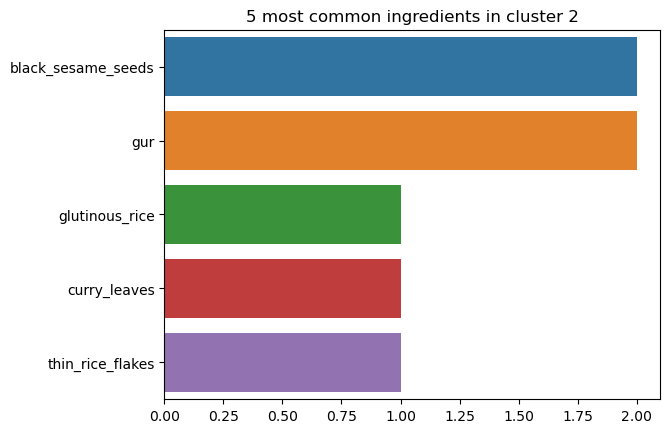

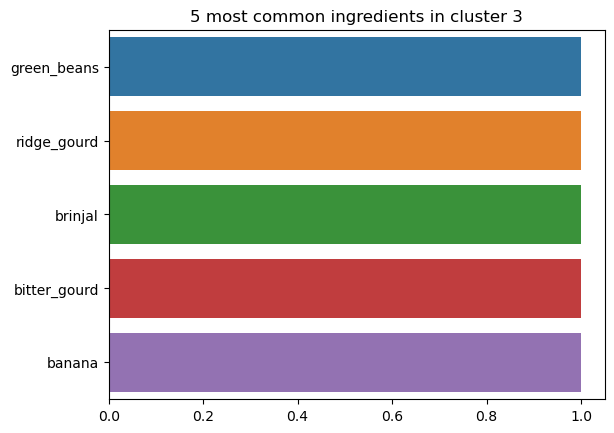

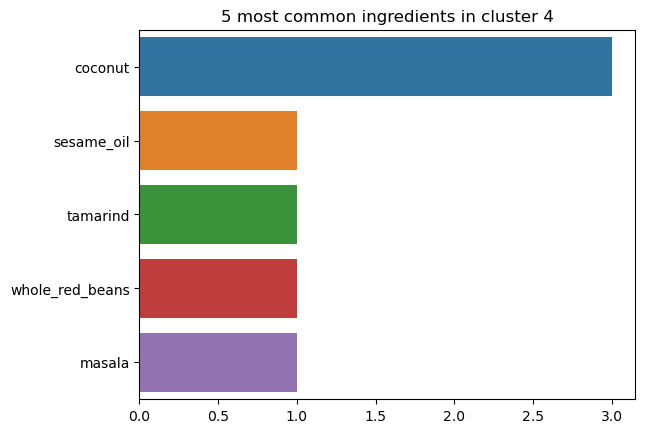

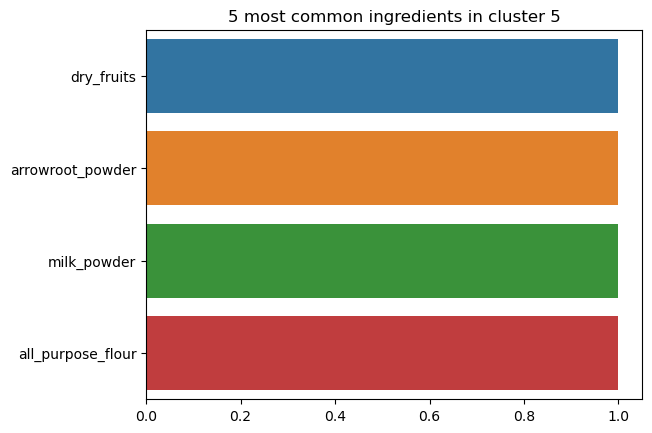

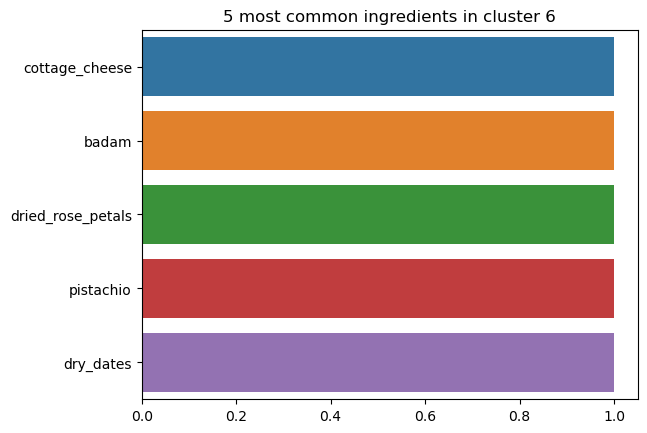

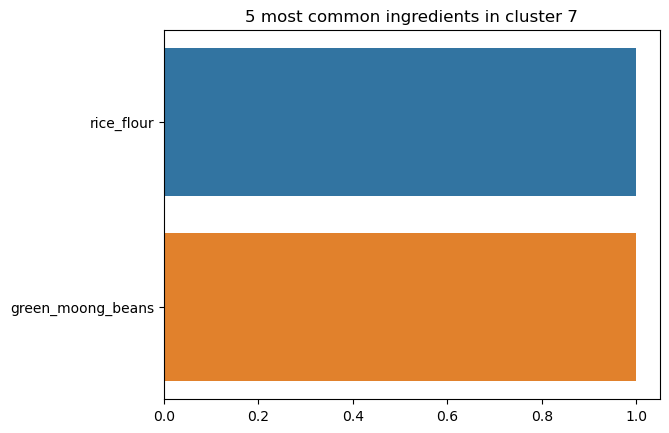

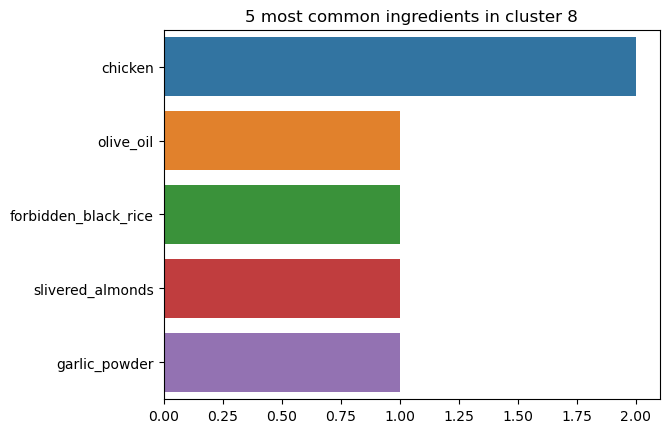

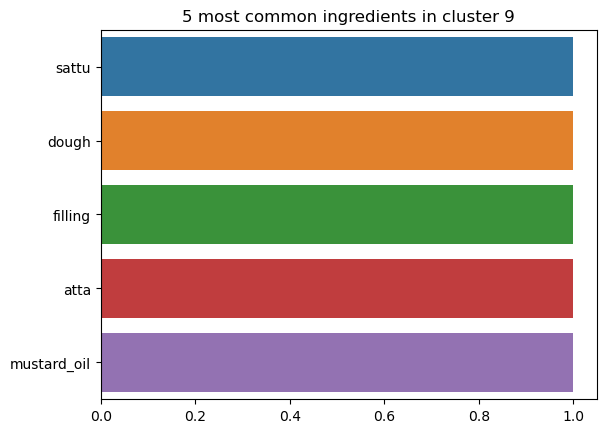

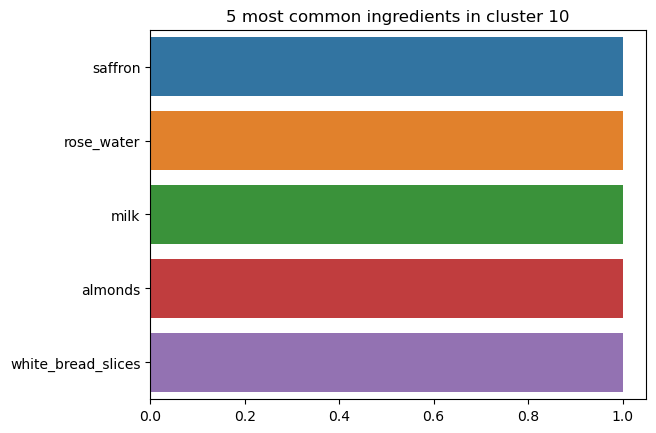

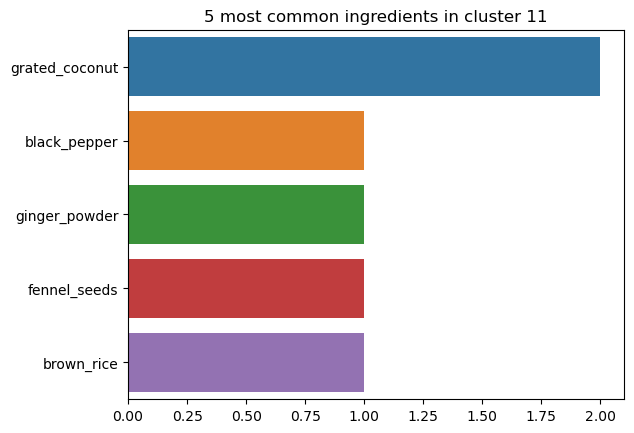

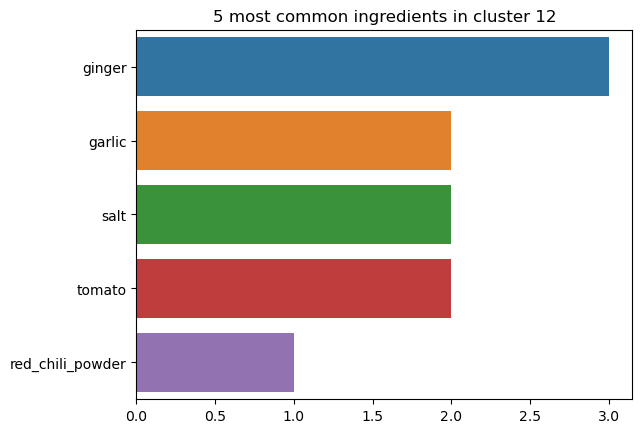

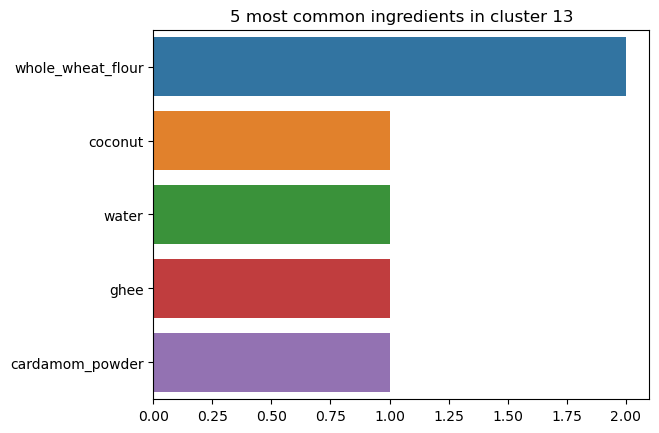

In [43]:

final_df_array = final_df.to_numpy()
n_feats = 5
dfs = get_top_features_cluster(final_df_array, y_pred, n_feats)
plotWords(dfs,n_feats=n_feats)